# Understanding Weather Through Atmospheric Dynamics

## Learning Objectives
By completing this tutorial, you will:
- Understand fundamental atmospheric physics and pressure systems
- Master the Coriolis effect and its role in weather patterns
- Calculate geostrophic winds from pressure gradients
- Model storm development and intensification
- Understand weather forecasting principles and limitations
- Apply mathematical models to atmospheric phenomena

## Prerequisites
- Basic physics (pressure, forces, motion)
- Elementary calculus (derivatives, gradients)
- Python programming fundamentals



## Introduction: Why Study Atmospheric Science?

Weather affects every aspect of human society and the global economy:

### Societal Impact
- **Safety**: Early warnings save approximately 23,000 lives annually worldwide
- **Agriculture**: $1.5 trillion global agricultural sector depends on weather forecasts
- **Energy**: Wind and solar power generation ($282 billion market) requires accurate forecasting
- **Transportation**: Aviation alone saves $700 million annually through weather routing
- **Economics**: Weather-sensitive industries represent 30% of US GDP (~$6 trillion)

### Scientific Foundation
Atmospheric science combines:
- **Fluid dynamics**: Navier-Stokes equations govern air motion
- **Thermodynamics**: Energy transfer drives weather systems
- **Numerical methods**: Solving millions of equations simultaneously
- **Data science**: Processing terabytes of observations daily

### Historical Context
- 1904: Vilhelm Bjerknes proposes numerical weather prediction
- 1950: First computer weather forecast (ENIAC)
- 1960: First weather satellite (TIROS-1)
- Today: Ensemble forecasts run on supercomputers with 10^16 calculations/second

In [3]:
# Import essential libraries for atmospheric analysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')

# Configure visualization
plt.style.use('seaborn-v0_8-whitegrid')

# Set random seed for reproducibility
np.random.seed(42)

print("Atmospheric Science Environment Initialized")
print(f"NumPy version: {np.__version__}")
print("\nPhysical constants loaded:")

# Fundamental atmospheric constants
STANDARD_PRESSURE = 1013.25      # hPa at sea level
EARTH_ROTATION = 7.2921e-5       # rad/s
GAS_CONSTANT_DRY = 287           # J/(kg·K)
GRAVITY = 9.81                   # m/s²
EARTH_RADIUS = 6.371e6           # meters
AIR_DENSITY_SEA = 1.225          # kg/m³

print(f"  Standard pressure: {STANDARD_PRESSURE} hPa")
print(f"  Earth rotation: {EARTH_ROTATION:.2e} rad/s")
print(f"  Gravity: {GRAVITY} m/s²")

Atmospheric Science Environment Initialized
NumPy version: 2.2.6

Physical constants loaded:
  Standard pressure: 1013.25 hPa
  Earth rotation: 7.29e-05 rad/s
  Gravity: 9.81 m/s²


## Part 1: The Coriolis Effect - Earth's Rotation Shapes Weather

The **Coriolis effect** is an apparent force due to Earth's rotation that deflects moving objects:

### Mathematical Foundation
Coriolis parameter: $f = 2\Omega \sin(\phi)$

Where:
- $\Omega$ = Earth's rotation rate (7.29×10⁻⁵ rad/s)
- $\phi$ = latitude

### Physical Effects
- **Northern Hemisphere**: Deflection to the right
- **Southern Hemisphere**: Deflection to the left
- **Equator**: No Coriolis effect (f = 0)
- **Poles**: Maximum effect

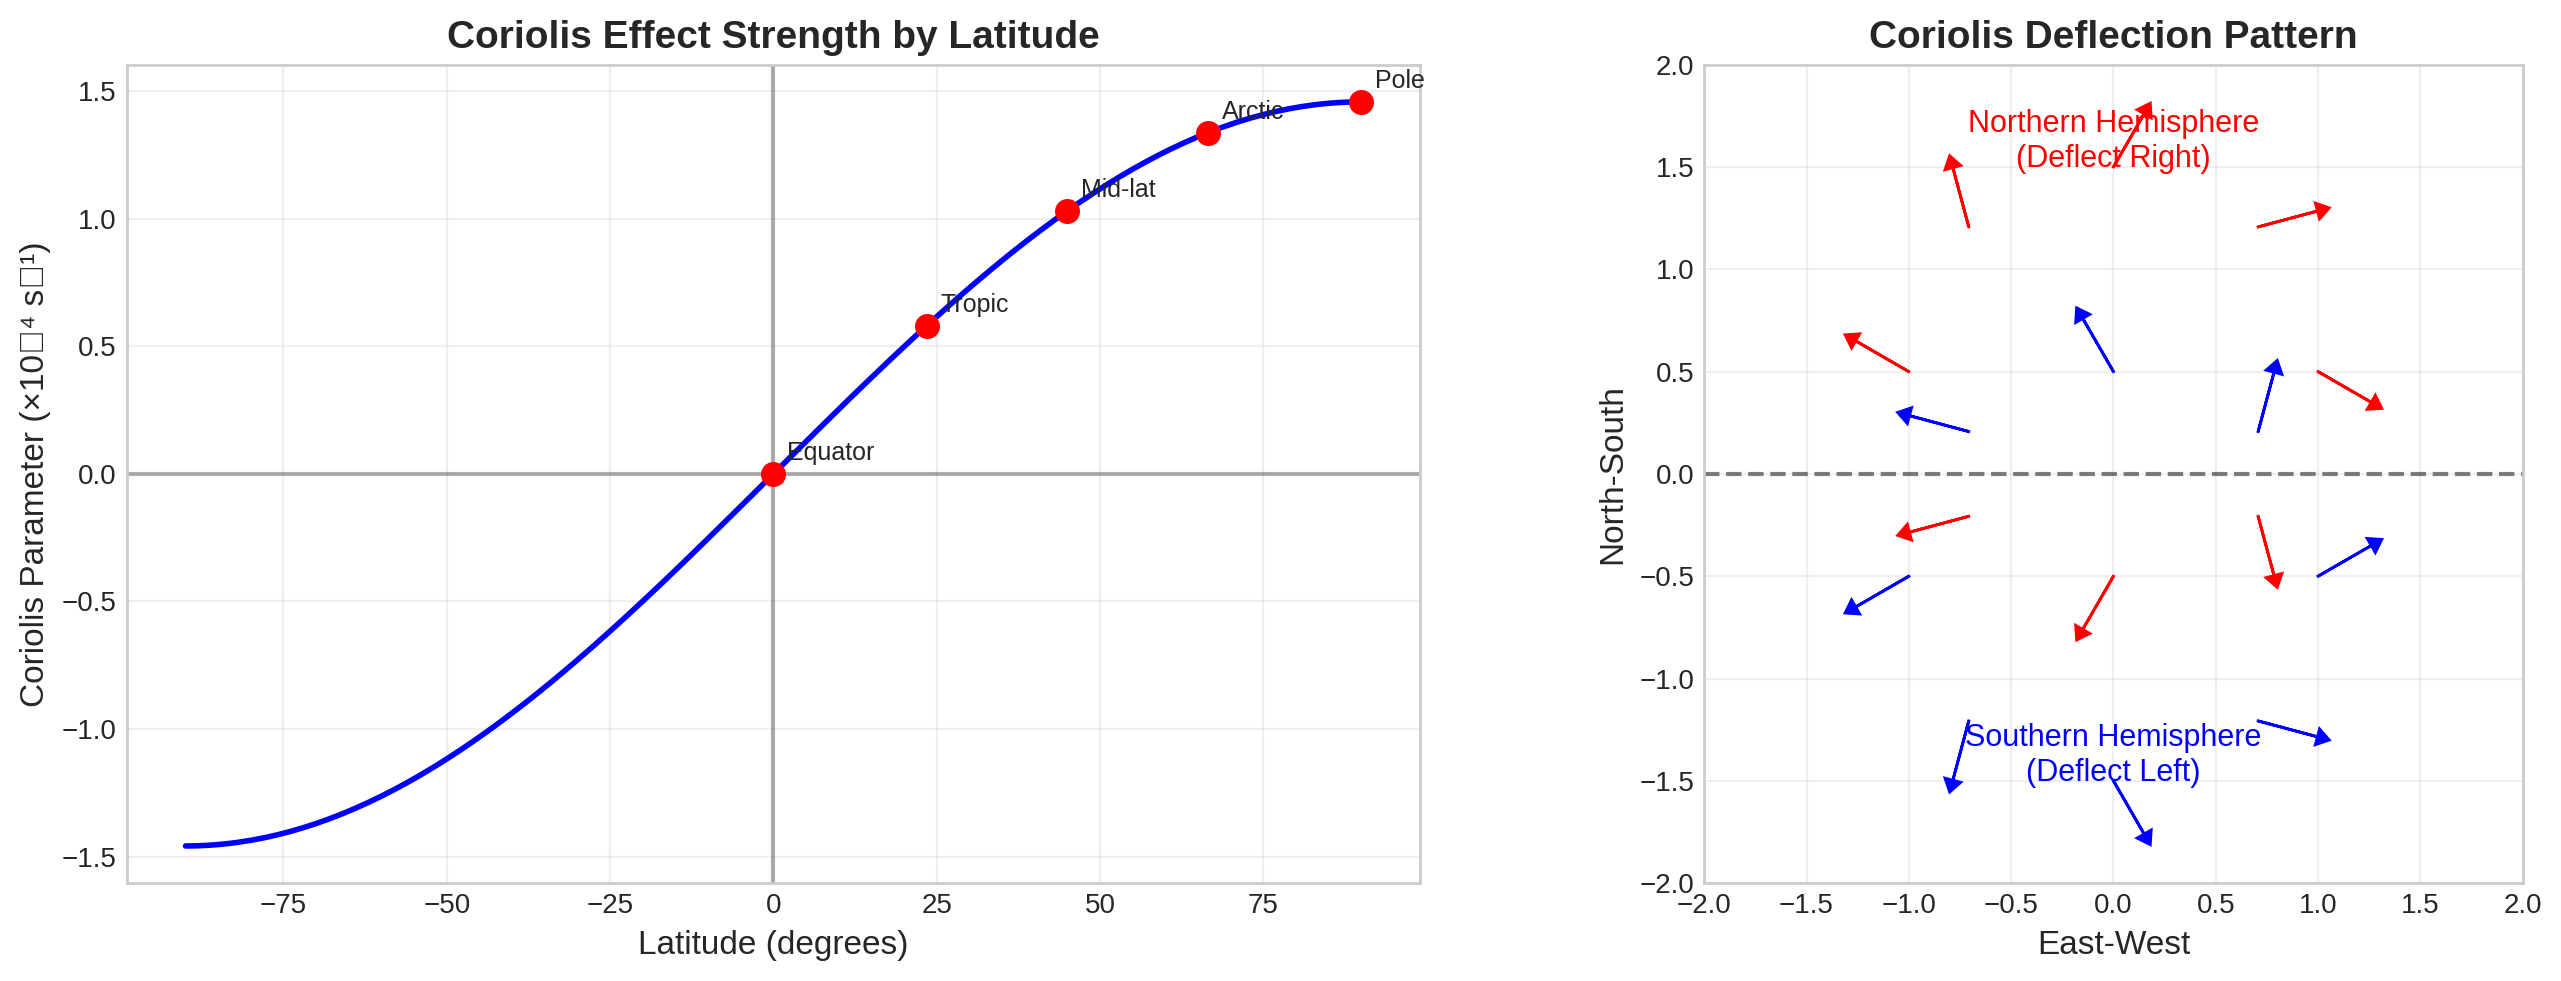


Coriolis Parameter at Key Latitudes:
Latitude   0°: f = +0.00e+00 s⁻¹, Period = inf hours
Latitude  30°: f = +7.29e-05 s⁻¹, Period = 23.9 hours
Latitude  45°: f = +1.03e-04 s⁻¹, Period = 16.9 hours
Latitude  60°: f = +1.26e-04 s⁻¹, Period = 13.8 hours
Latitude  90°: f = +1.46e-04 s⁻¹, Period = 12.0 hours


In [4]:
def coriolis_parameter(latitude_deg):
    """
    Calculate Coriolis parameter at given latitude.
    
    Parameters:
    latitude_deg: Latitude in degrees (-90 to 90)
    
    Returns:
    f: Coriolis parameter (s⁻¹)
    """
    lat_rad = np.radians(latitude_deg)
    return 2 * EARTH_ROTATION * np.sin(lat_rad)

# Calculate Coriolis effect across all latitudes
latitudes = np.linspace(-90, 90, 181)
coriolis_values = [coriolis_parameter(lat) for lat in latitudes]

# Visualize Coriolis parameter variation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Coriolis parameter vs latitude
ax1.plot(latitudes, np.array(coriolis_values)*1e4, 'b-', linewidth=2)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.set_xlabel('Latitude (degrees)', fontsize=12)
ax1.set_ylabel('Coriolis Parameter (×10⁻⁴ s⁻¹)', fontsize=12)
ax1.set_title('Coriolis Effect Strength by Latitude', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Mark key latitudes
key_lats = [0, 23.5, 45, 66.5, 90]
key_names = ['Equator', 'Tropic', 'Mid-lat', 'Arctic', 'Pole']
for lat, name in zip(key_lats, key_names):
    f_val = coriolis_parameter(lat)
    ax1.plot(lat, f_val*1e4, 'ro', markersize=8)
    ax1.annotate(name, (lat, f_val*1e4), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Plot 2: Deflection demonstration
ax2.set_title('Coriolis Deflection Pattern', fontsize=14, fontweight='bold')
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_aspect('equal')

# Northern hemisphere arrows (deflect right)
for angle in np.linspace(0, 2*np.pi, 8, endpoint=False):
    x, y = np.cos(angle), np.sin(angle) + 0.5
    dx, dy = 0.3*np.cos(angle), 0.3*np.sin(angle)
    # Add deflection
    deflect_angle = angle - np.pi/6  # Deflect right
    dx_deflect = 0.3*np.cos(deflect_angle)
    dy_deflect = 0.3*np.sin(deflect_angle)
    ax2.arrow(x, y, dx_deflect, dy_deflect, 
             head_width=0.08, head_length=0.06, fc='red', ec='red')

# Southern hemisphere arrows (deflect left)
for angle in np.linspace(0, 2*np.pi, 8, endpoint=False):
    x, y = np.cos(angle), np.sin(angle) - 0.5
    dx, dy = 0.3*np.cos(angle), 0.3*np.sin(angle)
    # Add deflection
    deflect_angle = angle + np.pi/6  # Deflect left
    dx_deflect = 0.3*np.cos(deflect_angle)
    dy_deflect = 0.3*np.sin(deflect_angle)
    ax2.arrow(x, y, dx_deflect, dy_deflect, 
             head_width=0.08, head_length=0.06, fc='blue', ec='blue')

ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.text(0, 1.5, 'Northern Hemisphere\n(Deflect Right)', 
         ha='center', fontsize=11, color='red')
ax2.text(0, -1.5, 'Southern Hemisphere\n(Deflect Left)', 
         ha='center', fontsize=11, color='blue')
ax2.set_xlabel('East-West', fontsize=12)
ax2.set_ylabel('North-South', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print values at key latitudes
print("\nCoriolis Parameter at Key Latitudes:")
print("="*40)
for lat in [0, 30, 45, 60, 90]:
    f = coriolis_parameter(lat)
    period = 2*np.pi/abs(f) / 3600 if f != 0 else np.inf
    print(f"Latitude {lat:3d}°: f = {f:+.2e} s⁻¹, Period = {period:.1f} hours")

## Part 2: Pressure Systems - The Engines of Weather

Atmospheric pressure variations drive all weather phenomena:

### High Pressure Systems (Anticyclones)
- Air descends and diverges at surface
- Rotation: Clockwise (NH) / Anticlockwise (SH)
- Weather: Clear skies, calm conditions
- Temperature: Hot in summer, cold in winter

### Low Pressure Systems (Cyclones)
- Air converges at surface and rises
- Rotation: Anticlockwise (NH) / Clockwise (SH)
- Weather: Clouds, precipitation, storms
- Associated with frontal systems

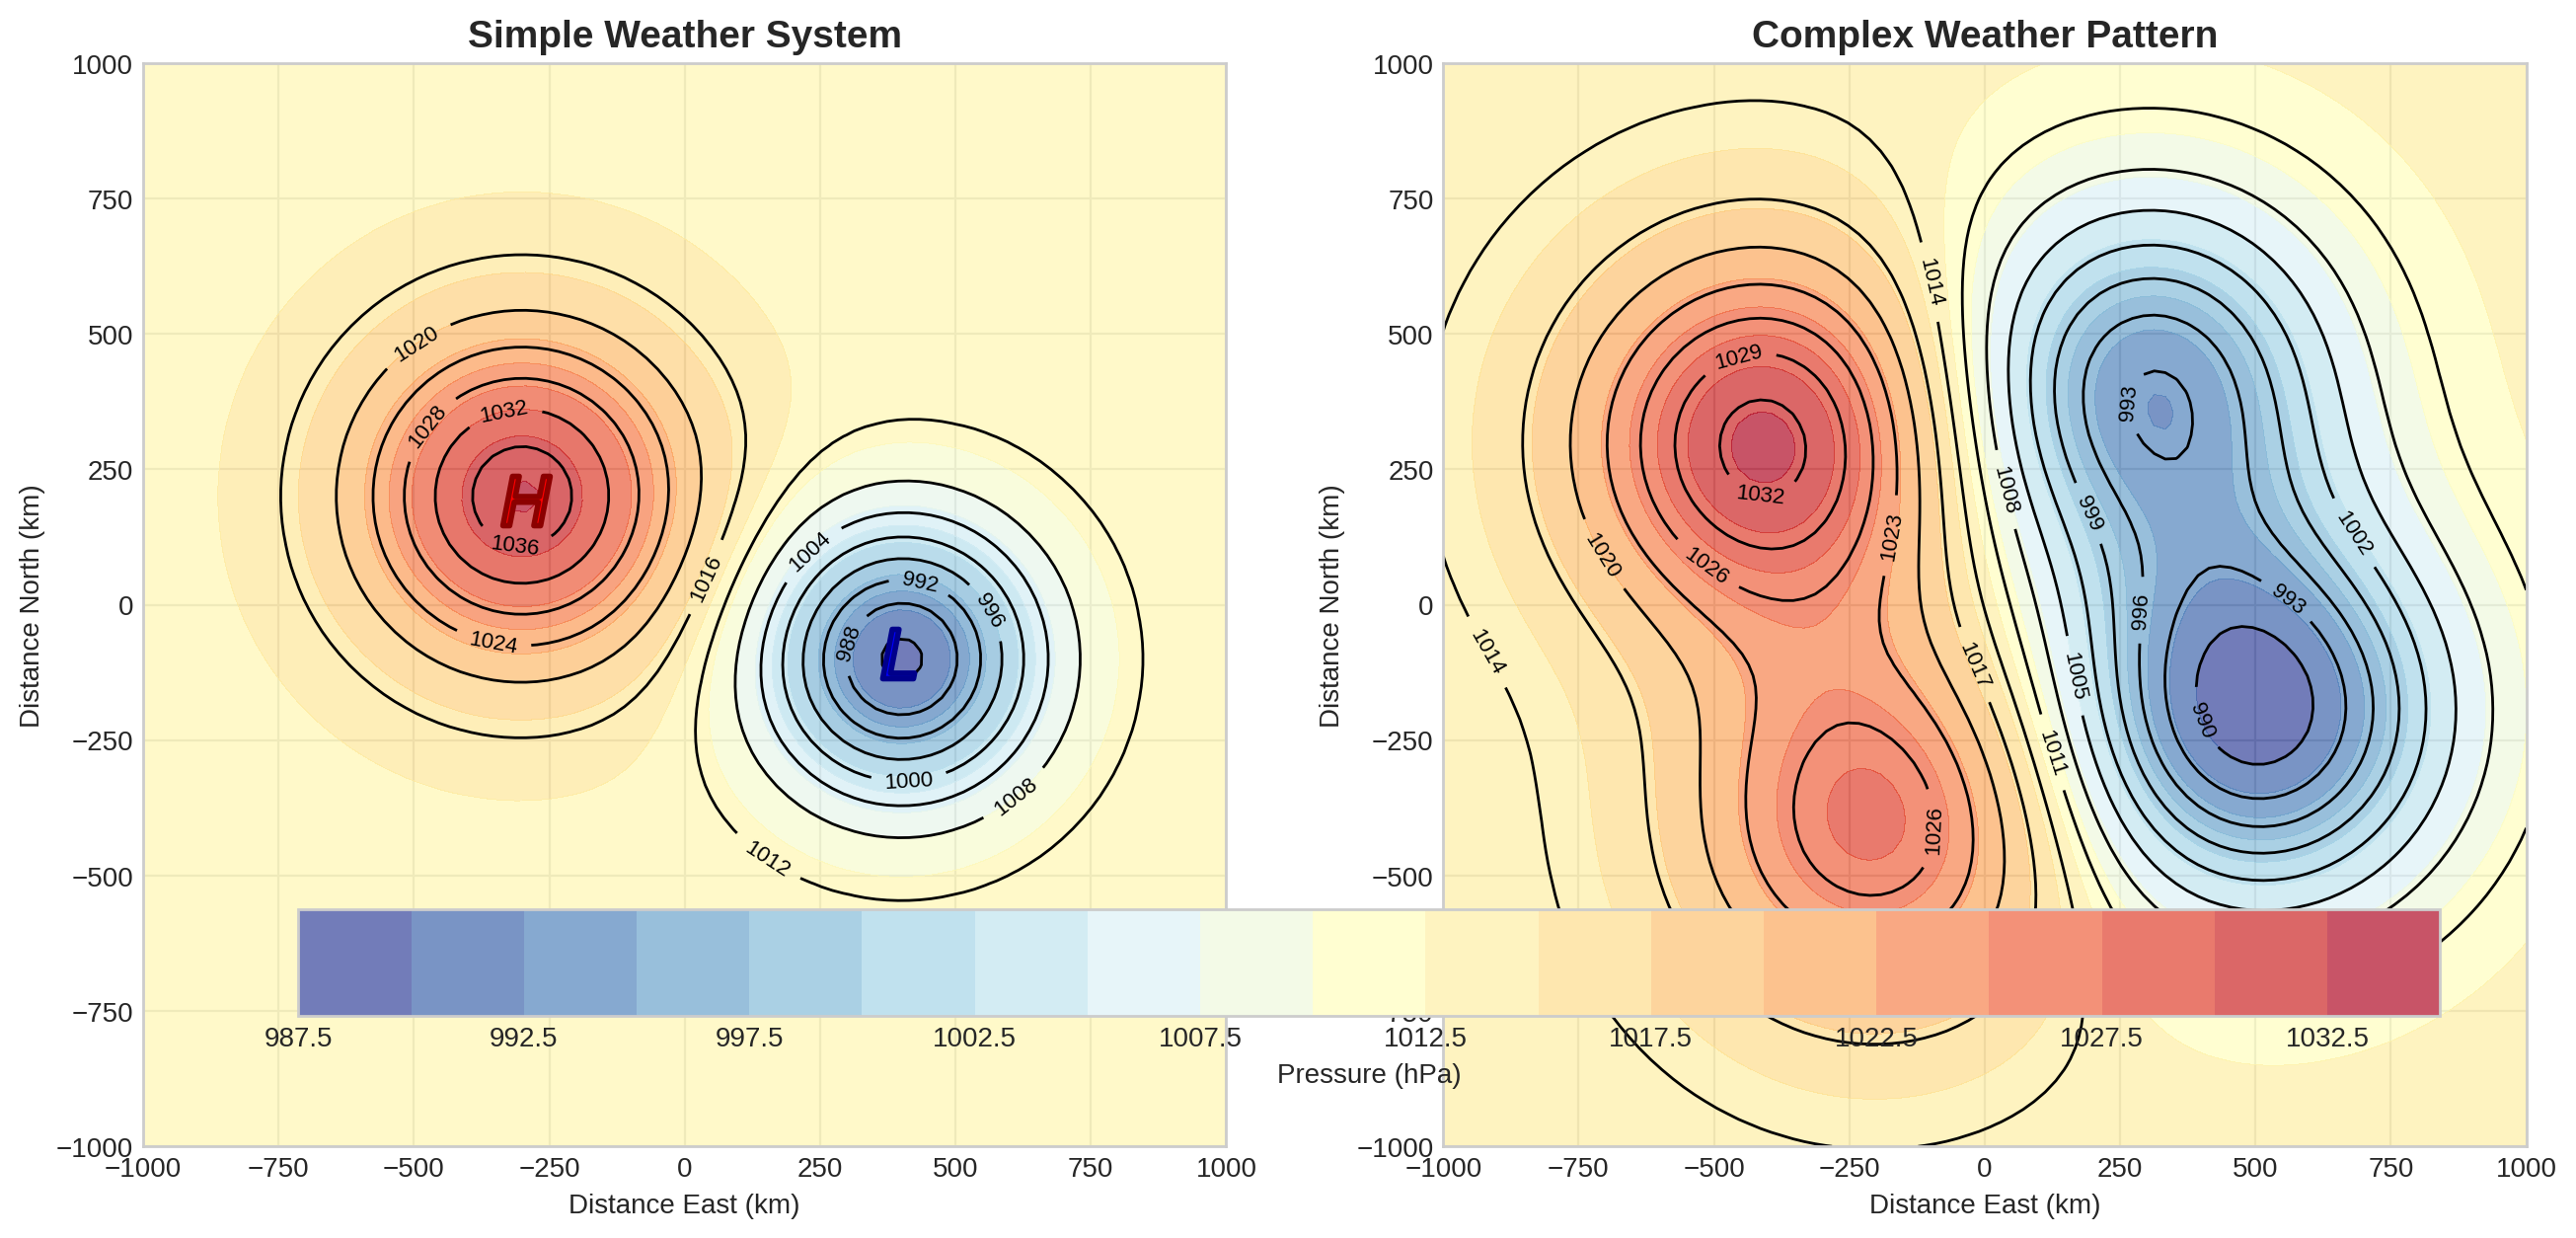

Pressure field statistics:
  Simple:  Min=983.4 hPa, Max=1038.2 hPa
  Complex: Min=987.6 hPa, Max=1033.1 hPa


In [9]:
import numpy as np
import matplotlib.pyplot as plt

STANDARD_PRESSURE = 1013.25  # hPa

def create_pressure_field(grid_size=100, complexity='simple'):
    x = np.linspace(-1000, 1000, grid_size)  # km
    y = np.linspace(-1000, 1000, grid_size)  # km
    X, Y = np.meshgrid(x, y)
    pressure = np.ones_like(X) * STANDARD_PRESSURE
    
    if complexity == 'simple':
        high_x, high_y = -300, 200
        high_strength = 25
        dist_high = np.sqrt((X - high_x)**2 + (Y - high_y)**2)
        pressure += high_strength * np.exp(-(dist_high/300)**2)
        
        low_x, low_y = 400, -100
        low_strength = -30
        dist_low = np.sqrt((X - low_x)**2 + (Y - low_y)**2)
        pressure += low_strength * np.exp(-(dist_low/250)**2)
    else:
        centers = [(-400, 300, 20), (500, -200, -25), (-200, -400, 15), (300, 400, -20)]
        for cx, cy, strength in centers:
            dist = np.sqrt((X - cx)**2 + (Y - cy)**2)
            pressure += strength * np.exp(-(dist/350)**2)
    return X, Y, pressure

# Create fields
X_simple, Y_simple, P_simple = create_pressure_field(complexity='simple')
X_complex, Y_complex, P_complex = create_pressure_field(complexity='complex')

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Simple
cs1 = ax1.contour(X_simple, Y_simple, P_simple, levels=15, colors='black', linewidths=1)
ax1.clabel(cs1, inline=True, fontsize=8, fmt='%d')
cf1 = ax1.contourf(X_simple, Y_simple, P_simple, levels=20, cmap='RdYlBu_r', alpha=0.7)
ax1.set_title('Simple Weather System', fontsize=14, fontweight='bold')
ax1.set_xlabel('Distance East (km)')
ax1.set_ylabel('Distance North (km)')
ax1.set_aspect('equal')

# Mark centers (use text markers)
high_mask = P_simple > STANDARD_PRESSURE + 20
low_mask = P_simple < STANDARD_PRESSURE - 20
if high_mask.any():
    high_idx = np.unravel_index(P_simple.argmax(), P_simple.shape)
    ax1.plot(X_simple[high_idx], Y_simple[high_idx],
             color='r', marker='$H$', linestyle='None',
             markersize=18, markeredgecolor='darkred', markeredgewidth=2)
if low_mask.any():
    low_idx = np.unravel_index(P_simple.argmin(), P_simple.shape)
    ax1.plot(X_simple[low_idx], Y_simple[low_idx],
             color='b', marker='$L$', linestyle='None',
             markersize=18, markeredgecolor='darkblue', markeredgewidth=2)

# Complex
cs2 = ax2.contour(X_complex, Y_complex, P_complex, levels=15, colors='black', linewidths=1)
ax2.clabel(cs2, inline=True, fontsize=8, fmt='%d')
cf2 = ax2.contourf(X_complex, Y_complex, P_complex, levels=20, cmap='RdYlBu_r', alpha=0.7)
ax2.set_title('Complex Weather Pattern', fontsize=14, fontweight='bold')
ax2.set_xlabel('Distance East (km)')
ax2.set_ylabel('Distance North (km)')
ax2.set_aspect('equal')

# Colorbar
cbar = fig.colorbar(cf2, ax=[ax1, ax2], orientation='horizontal', pad=0.1)
cbar.set_label('Pressure (hPa)')

plt.tight_layout()
plt.show()

print("Pressure field statistics:")
print(f"  Simple:  Min={P_simple.min():.1f} hPa, Max={P_simple.max():.1f} hPa")
print(f"  Complex: Min={P_complex.min():.1f} hPa, Max={P_complex.max():.1f} hPa")

## Part 3: Geostrophic Wind - Balance of Forces

In the free atmosphere (above the boundary layer), wind results from balance between:

### Force Balance
1. **Pressure Gradient Force (PGF)**: $\vec{F}_p = -\frac{1}{\rho}\nabla p$
2. **Coriolis Force**: $\vec{F}_c = -f\vec{k} \times \vec{v}$

### Geostrophic Wind Equations
At equilibrium:
- $u_g = -\frac{1}{\rho f}\frac{\partial p}{\partial y}$
- $v_g = \frac{1}{\rho f}\frac{\partial p}{\partial x}$

Where $u$ is eastward and $v$ is northward wind component.

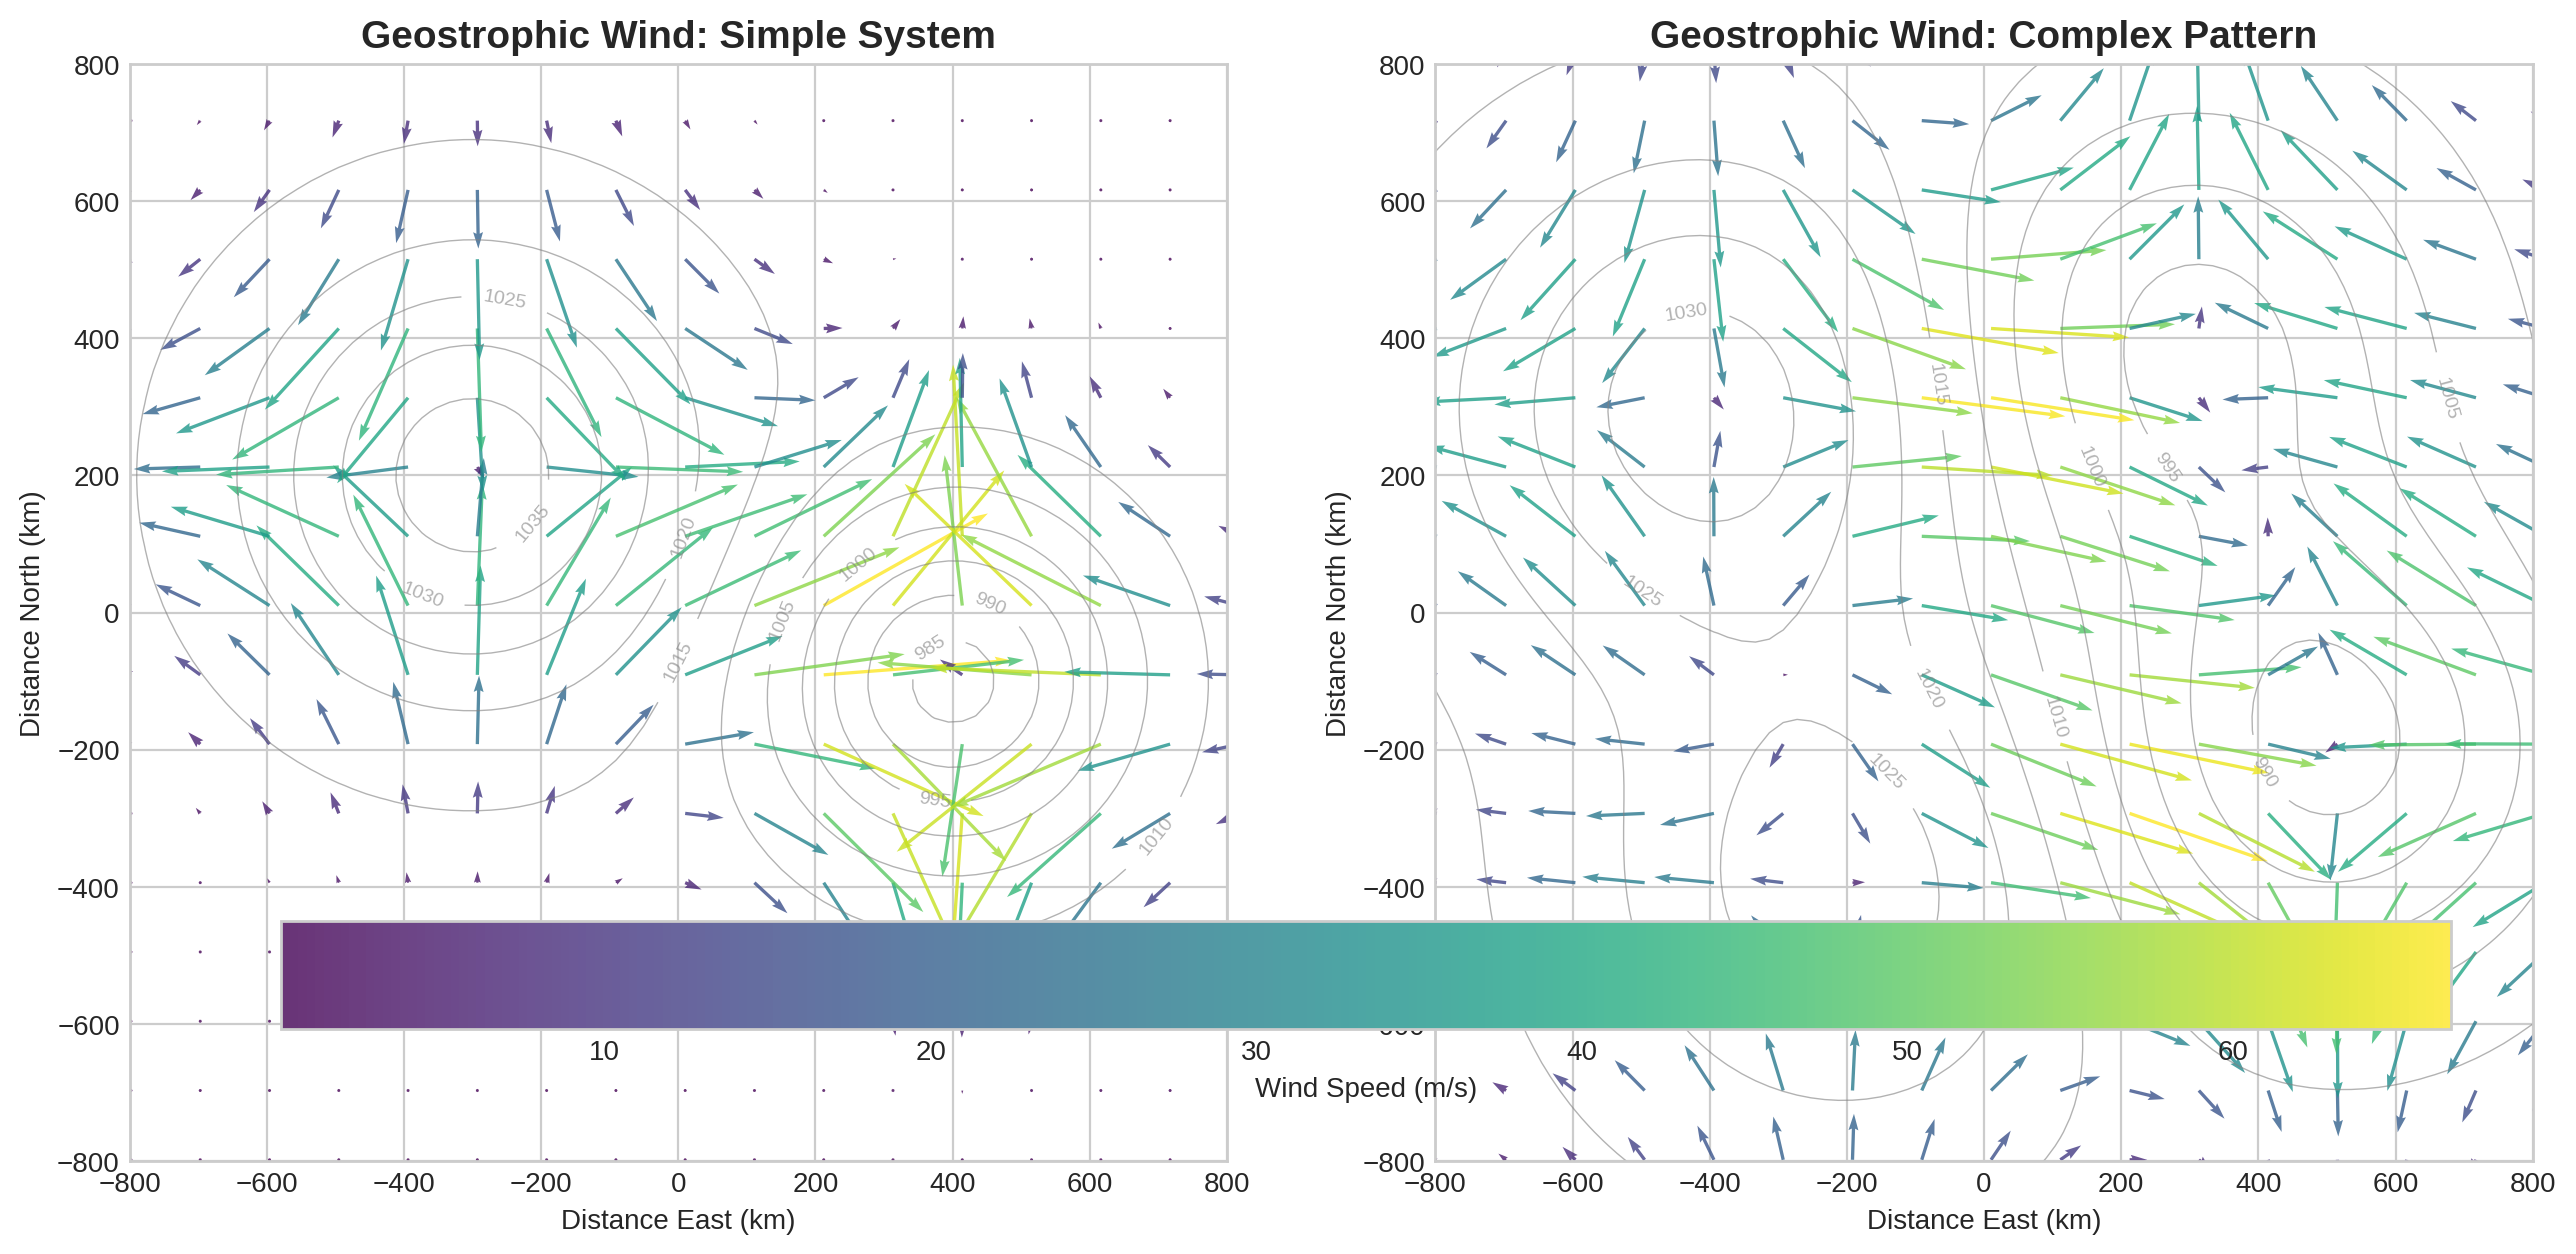


Wind statistics:
  Simple:  Max speed = 87.2 m/s
  Complex: Max speed = 67.4 m/s

Note: Winds flow parallel to isobars (pressure contours)
      due to geostrophic balance at 45° latitude


In [6]:
def calculate_geostrophic_wind(X, Y, pressure, latitude=45):
    """
    Calculate geostrophic wind from pressure field.
    """
    # Grid spacing
    dx = (X[0, 1] - X[0, 0]) * 1000  # Convert km to m
    dy = (Y[1, 0] - Y[0, 0]) * 1000
    
    # Coriolis parameter
    f = coriolis_parameter(latitude)
    
    # Pressure gradients (convert hPa to Pa)
    dP_dx, dP_dy = np.gradient(pressure * 100, dx, dy)
    
    # Geostrophic wind components
    u_geo = -(1 / (AIR_DENSITY_SEA * f)) * dP_dy  # Eastward
    v_geo = (1 / (AIR_DENSITY_SEA * f)) * dP_dx   # Northward
    
    # Wind speed and direction
    speed = np.sqrt(u_geo**2 + v_geo**2)
    direction = np.degrees(np.arctan2(v_geo, u_geo))
    
    return u_geo, v_geo, speed, direction

# Calculate wind fields
u_s, v_s, speed_s, dir_s = calculate_geostrophic_wind(X_simple, Y_simple, P_simple)
u_c, v_c, speed_c, dir_c = calculate_geostrophic_wind(X_complex, Y_complex, P_complex)

# Visualize pressure and wind
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Simple system with winds
cs1 = ax1.contour(X_simple, Y_simple, P_simple, 
                  levels=10, colors='gray', linewidths=0.5, alpha=0.6)
ax1.clabel(cs1, inline=True, fontsize=7, fmt='%d')

# Wind vectors (subsample for clarity)
step = 5
Q1 = ax1.quiver(X_simple[::step, ::step], Y_simple[::step, ::step],
                u_s[::step, ::step], v_s[::step, ::step],
                speed_s[::step, ::step], scale=500, 
                cmap='viridis', alpha=0.8)
ax1.set_title('Geostrophic Wind: Simple System', fontsize=14, fontweight='bold')
ax1.set_xlabel('Distance East (km)')
ax1.set_ylabel('Distance North (km)')
ax1.set_aspect('equal')
ax1.set_xlim(-800, 800)
ax1.set_ylim(-800, 800)

# Complex system with winds
cs2 = ax2.contour(X_complex, Y_complex, P_complex, 
                  levels=10, colors='gray', linewidths=0.5, alpha=0.6)
ax2.clabel(cs2, inline=True, fontsize=7, fmt='%d')

Q2 = ax2.quiver(X_complex[::step, ::step], Y_complex[::step, ::step],
                u_c[::step, ::step], v_c[::step, ::step],
                speed_c[::step, ::step], scale=500, 
                cmap='viridis', alpha=0.8)
ax2.set_title('Geostrophic Wind: Complex Pattern', fontsize=14, fontweight='bold')
ax2.set_xlabel('Distance East (km)')
ax2.set_ylabel('Distance North (km)')
ax2.set_aspect('equal')
ax2.set_xlim(-800, 800)
ax2.set_ylim(-800, 800)

# Add colorbar for wind speed
cbar = fig.colorbar(Q2, ax=[ax1, ax2], label='Wind Speed (m/s)', 
                    orientation='horizontal', pad=0.1)

plt.tight_layout()
plt.show()

print(f"\nWind statistics:")
print(f"  Simple:  Max speed = {speed_s.max():.1f} m/s")
print(f"  Complex: Max speed = {speed_c.max():.1f} m/s")
print(f"\nNote: Winds flow parallel to isobars (pressure contours)")
print(f"      due to geostrophic balance at 45° latitude")

## Part 4: Storm Development and Intensification

Storms develop through complex interactions of atmospheric processes:

### Cyclogenesis Factors
1. **Baroclinic Instability**: Temperature gradients create energy
2. **Divergence Aloft**: Upper-level divergence causes surface pressure drop
3. **Latent Heat Release**: Condensation provides energy
4. **Positive Feedback**: Intensification through coupled processes

### Tropical Cyclone Categories (Saffir-Simpson Scale)
- Category 1: 119-153 km/h
- Category 2: 154-177 km/h
- Category 3: 178-208 km/h
- Category 4: 209-251 km/h
- Category 5: >252 km/h

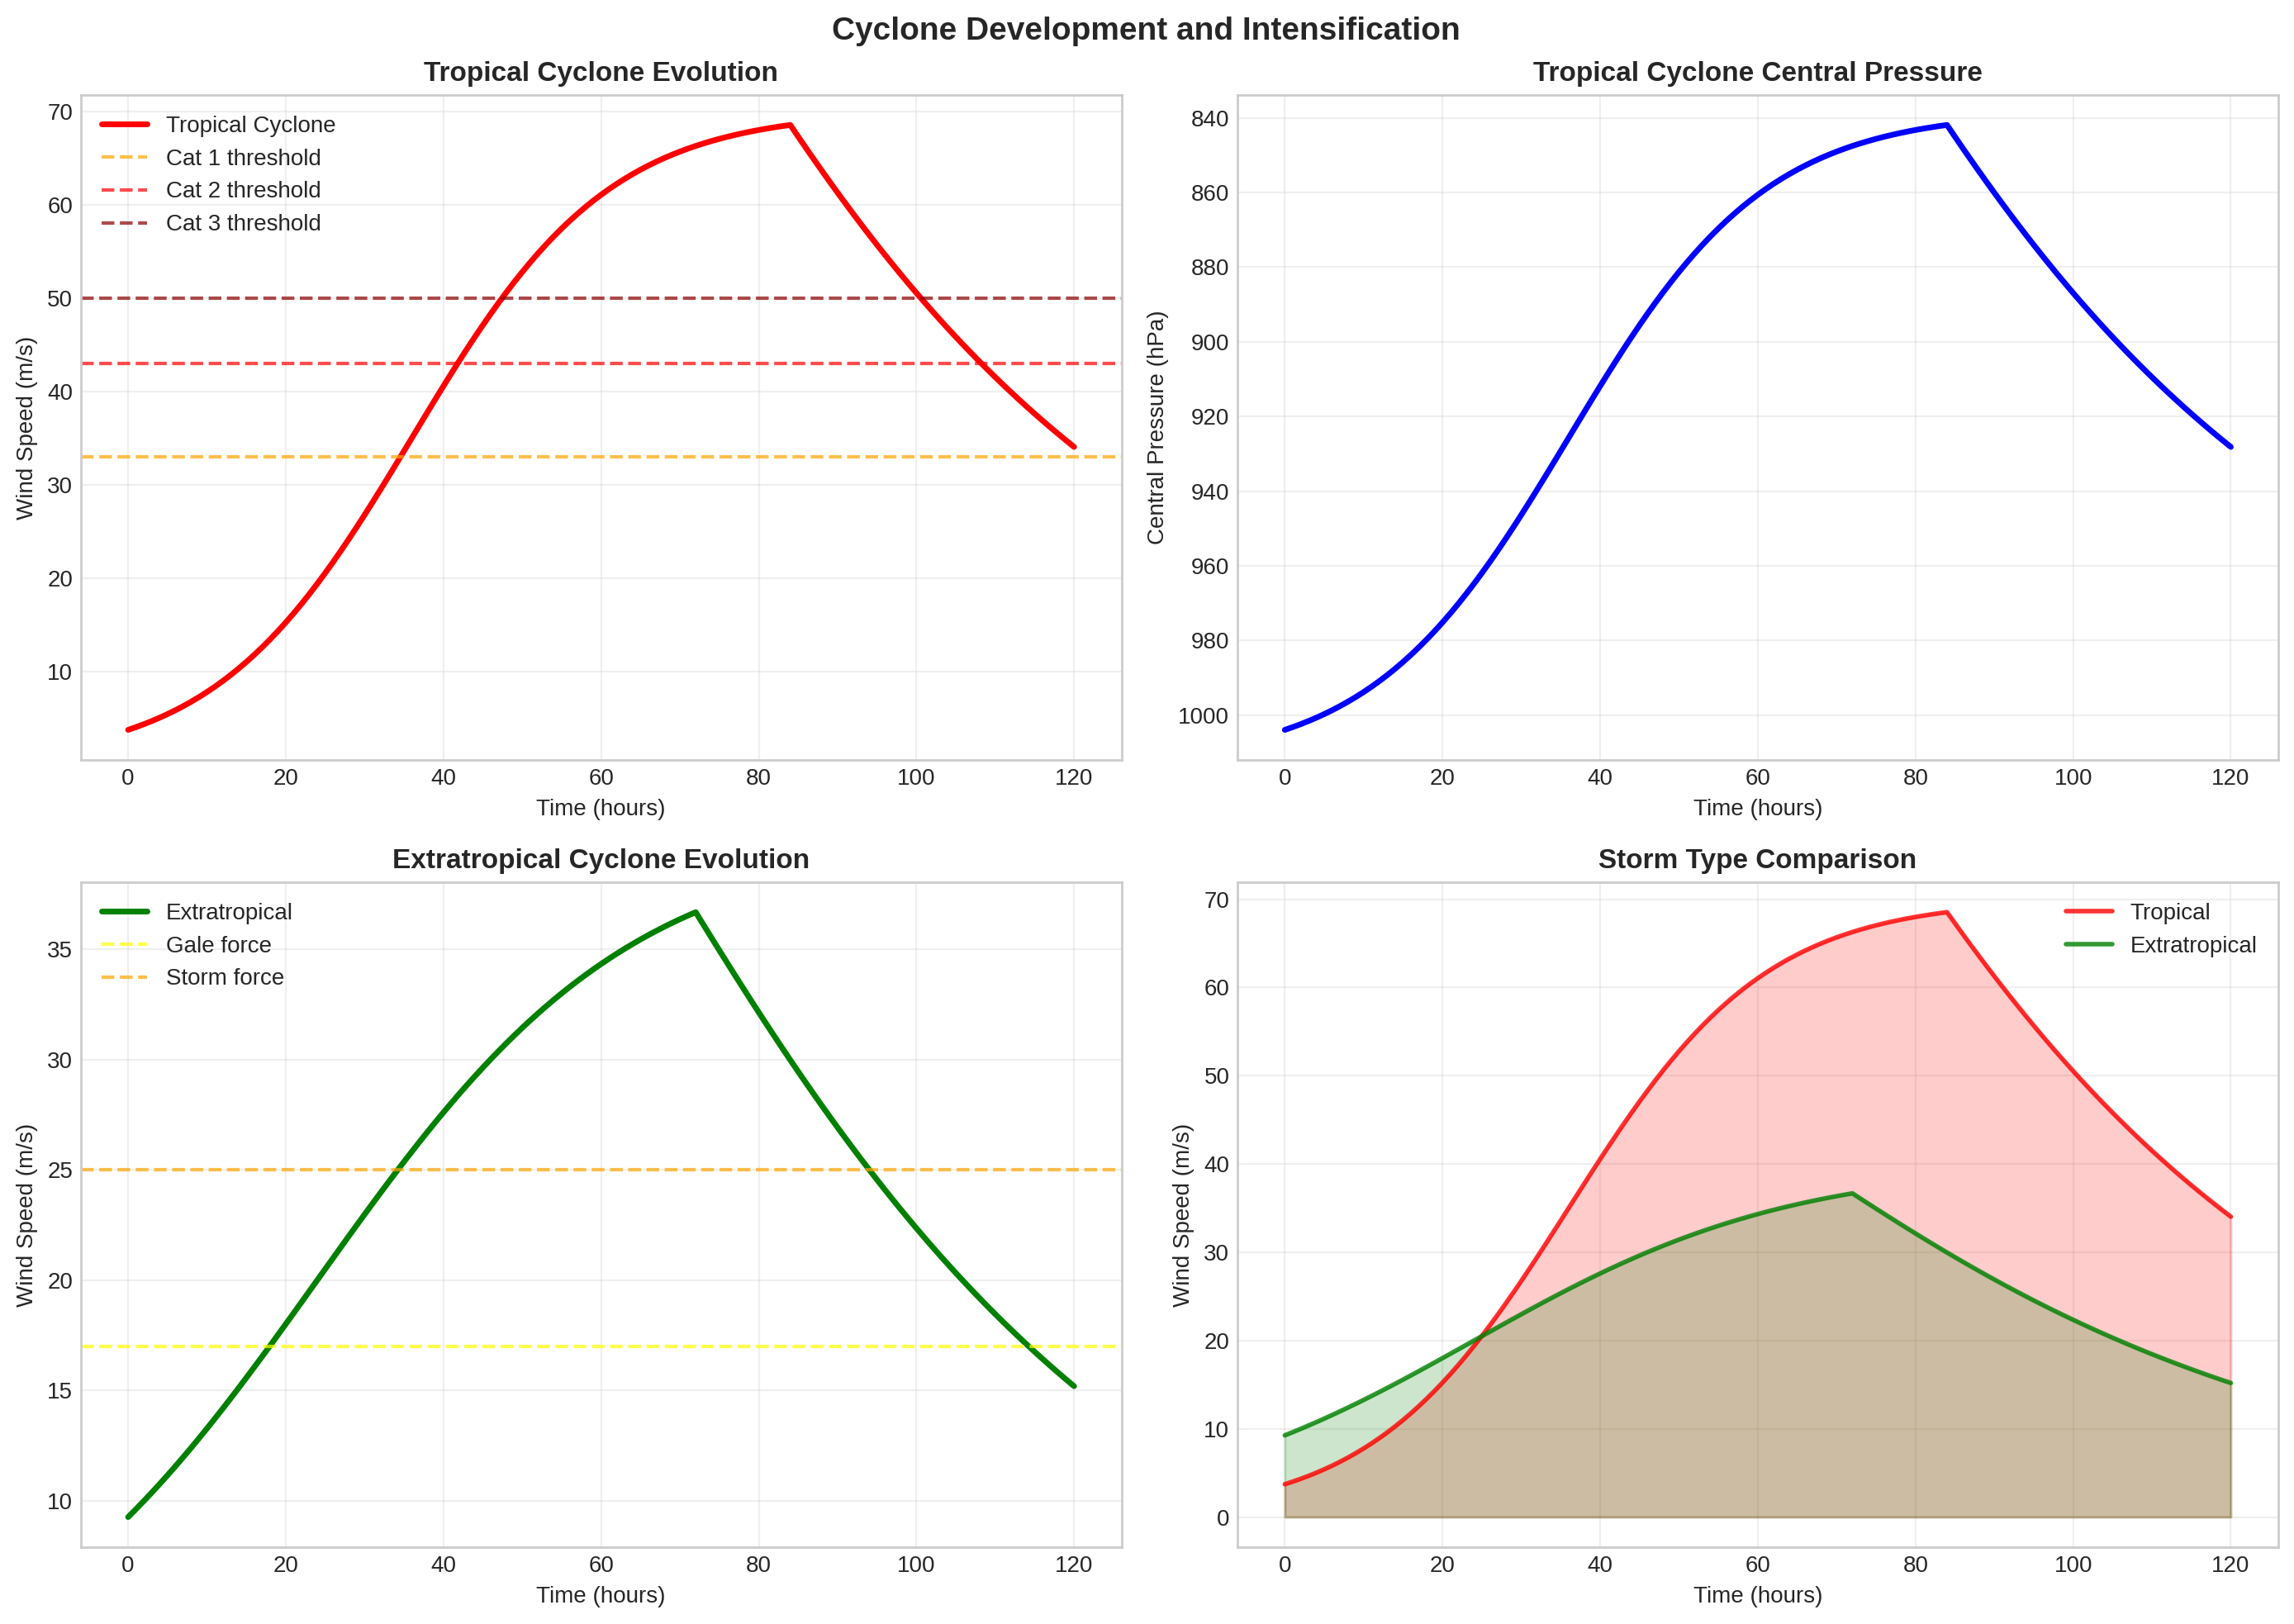

Storm characteristics:
Tropical cyclone:
  Peak wind: 68.5 m/s (247 km/h)
  Min pressure: 842 hPa
  Time to peak: 84 hours

Extratropical cyclone:
  Peak wind: 36.7 m/s (132 km/h)
  Min pressure: 922 hPa
  Time to peak: 72 hours


In [7]:
def storm_evolution(hours, storm_type='tropical'):
    """
    Model storm intensification over time.
    """
    if storm_type == 'tropical':
        # Tropical cyclone intensification (rapid)
        max_wind = 70  # m/s (Category 5)
        growth_rate = 0.08
        onset = 36  # Hours to rapid intensification
    else:  # extratropical
        # Mid-latitude cyclone (slower)
        max_wind = 40  # m/s
        growth_rate = 0.05
        onset = 24
    
    # Logistic growth with decay
    intensity = max_wind / (1 + np.exp(-growth_rate * (hours - onset)))
    
    # Add decay phase
    decay_start = onset + 48
    decay_mask = hours > decay_start
    intensity[decay_mask] *= np.exp(-0.02 * (hours[decay_mask] - decay_start))
    
    # Central pressure (empirical relationship)
    pressure = STANDARD_PRESSURE - 2.5 * intensity
    
    return intensity, pressure

# Simulate both storm types
time_hours = np.linspace(0, 120, 121)  # 5 days
tropical_wind, tropical_pressure = storm_evolution(time_hours, 'tropical')
extratropical_wind, extratropical_pressure = storm_evolution(time_hours, 'extratropical')

# Visualize storm evolution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Tropical cyclone wind speed
ax1 = axes[0, 0]
ax1.plot(time_hours, tropical_wind, 'r-', linewidth=2.5, label='Tropical Cyclone')
ax1.axhline(y=33, color='orange', linestyle='--', alpha=0.7, label='Cat 1 threshold')
ax1.axhline(y=43, color='red', linestyle='--', alpha=0.7, label='Cat 2 threshold')
ax1.axhline(y=50, color='darkred', linestyle='--', alpha=0.7, label='Cat 3 threshold')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Wind Speed (m/s)')
ax1.set_title('Tropical Cyclone Evolution', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Tropical cyclone pressure
ax2 = axes[0, 1]
ax2.plot(time_hours, tropical_pressure, 'b-', linewidth=2.5)
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Central Pressure (hPa)')
ax2.set_title('Tropical Cyclone Central Pressure', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()  # Lower pressure at top

# Extratropical cyclone wind speed
ax3 = axes[1, 0]
ax3.plot(time_hours, extratropical_wind, 'g-', linewidth=2.5, label='Extratropical')
ax3.axhline(y=17, color='yellow', linestyle='--', alpha=0.7, label='Gale force')
ax3.axhline(y=25, color='orange', linestyle='--', alpha=0.7, label='Storm force')
ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Wind Speed (m/s)')
ax3.set_title('Extratropical Cyclone Evolution', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)

# Comparison
ax4 = axes[1, 1]
ax4.plot(time_hours, tropical_wind, 'r-', linewidth=2, label='Tropical', alpha=0.8)
ax4.plot(time_hours, extratropical_wind, 'g-', linewidth=2, label='Extratropical', alpha=0.8)
ax4.fill_between(time_hours, 0, tropical_wind, color='red', alpha=0.2)
ax4.fill_between(time_hours, 0, extratropical_wind, color='green', alpha=0.2)
ax4.set_xlabel('Time (hours)')
ax4.set_ylabel('Wind Speed (m/s)')
ax4.set_title('Storm Type Comparison', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Cyclone Development and Intensification', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Storm characteristics:")
print(f"Tropical cyclone:")
print(f"  Peak wind: {tropical_wind.max():.1f} m/s ({tropical_wind.max()*3.6:.0f} km/h)")
print(f"  Min pressure: {tropical_pressure.min():.0f} hPa")
print(f"  Time to peak: {time_hours[tropical_wind.argmax()]:.0f} hours")
print(f"\nExtratropical cyclone:")
print(f"  Peak wind: {extratropical_wind.max():.1f} m/s ({extratropical_wind.max()*3.6:.0f} km/h)")
print(f"  Min pressure: {extratropical_pressure.min():.0f} hPa")
print(f"  Time to peak: {time_hours[extratropical_wind.argmax()]:.0f} hours")

## Part 5: Weather Forecasting Science

Modern weather prediction relies on numerical weather prediction (NWP):

### Forecast Process
1. **Data Collection**: 10,000+ weather stations, 1,600+ radiosondes, satellites
2. **Data Assimilation**: Combine 10⁷ observations with model state
3. **Numerical Integration**: Solve primitive equations on supercomputers
4. **Ensemble Forecasting**: Run 50+ model versions for uncertainty
5. **Post-processing**: Statistical correction and downscaling

### Predictability Limits
- **Lorenz (1963)**: Discovered chaotic behavior limits forecasts
- **Practical limit**: ~2 weeks for meaningful skill
- **Different variables have different predictability**

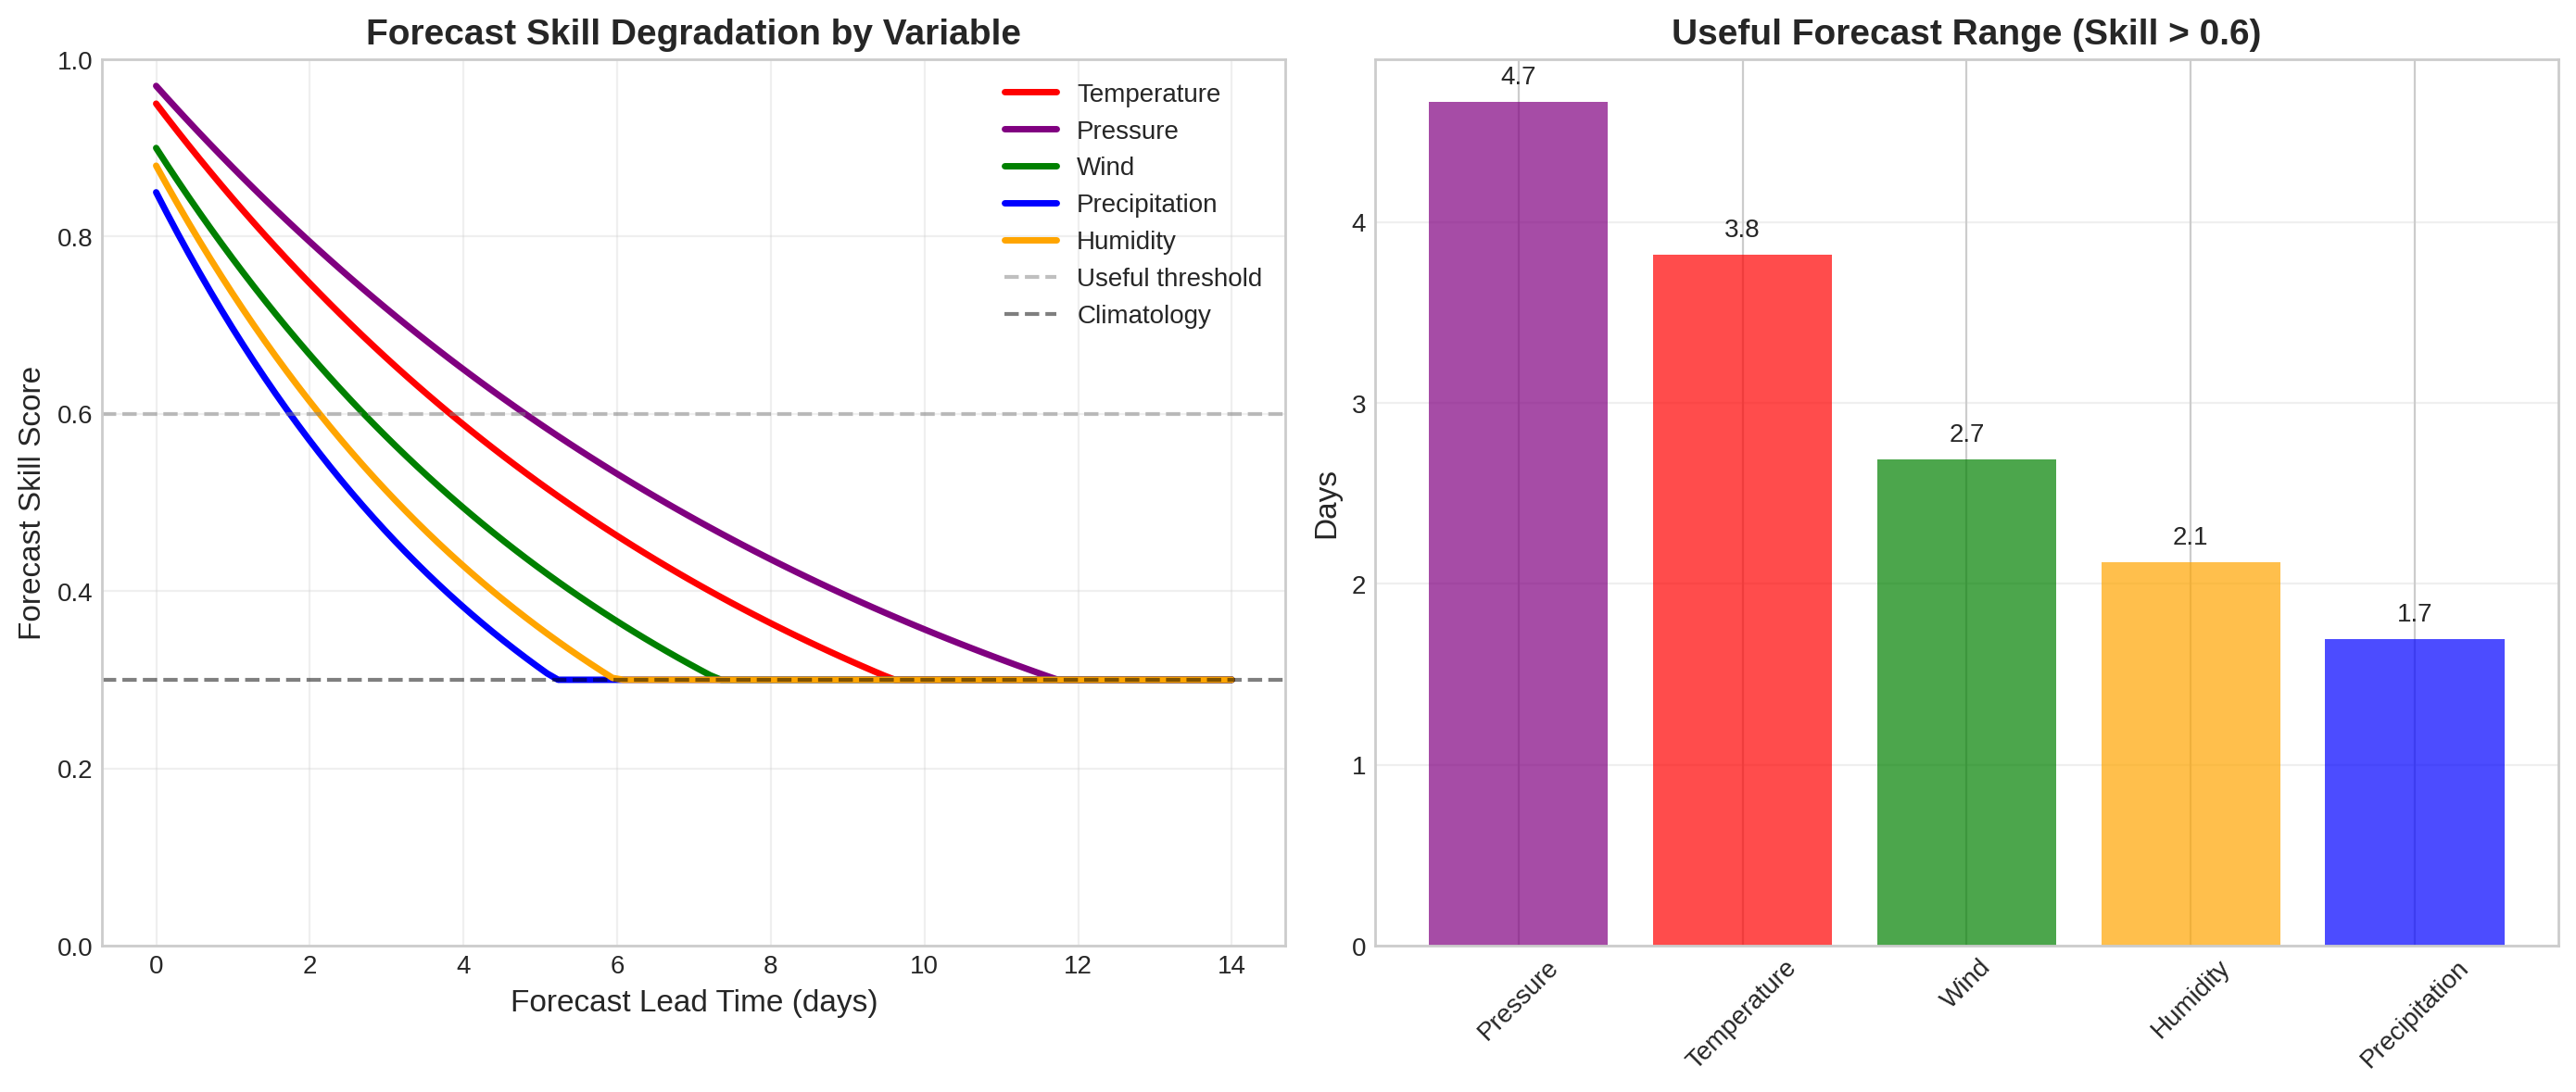

Forecast characteristics:
Temperature     Day 1: 0.84, Day 7: 0.41, Useful: 3.8 days
Pressure        Day 1: 0.88, Day 7: 0.48, Useful: 4.7 days
Wind            Day 1: 0.77, Day 7: 0.31, Useful: 2.7 days
Precipitation   Day 1: 0.70, Day 7: 0.30, Useful: 1.7 days
Humidity        Day 1: 0.74, Day 7: 0.30, Useful: 2.1 days


In [8]:
def forecast_skill(lead_time_days, variable='temperature'):
    """
    Model forecast skill degradation with lead time.
    Based on operational forecast verification statistics.
    """
    # Different decay rates for different variables
    decay_rates = {
        'temperature': 0.12,
        'pressure': 0.10,
        'wind': 0.15,
        'precipitation': 0.20,
        'humidity': 0.18
    }
    
    # Initial skill levels
    initial_skill = {
        'temperature': 0.95,
        'pressure': 0.97,
        'wind': 0.90,
        'precipitation': 0.85,
        'humidity': 0.88
    }
    
    decay = decay_rates.get(variable, 0.15)
    initial = initial_skill.get(variable, 0.90)
    
    # Exponential decay model
    skill = initial * np.exp(-decay * lead_time_days)
    
    # Add minimum skill (climatology)
    min_skill = 0.3
    skill = np.maximum(skill, min_skill)
    
    return skill

# Calculate skill for different variables
days = np.linspace(0, 14, 100)
variables = ['temperature', 'pressure', 'wind', 'precipitation', 'humidity']
colors = ['red', 'purple', 'green', 'blue', 'orange']

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Skill curves
for var, color in zip(variables, colors):
    skill = forecast_skill(days, var)
    ax1.plot(days, skill, color=color, linewidth=2.5, label=var.capitalize())

ax1.axhline(y=0.6, color='gray', linestyle='--', alpha=0.5, label='Useful threshold')
ax1.axhline(y=0.3, color='black', linestyle='--', alpha=0.5, label='Climatology')
ax1.set_xlabel('Forecast Lead Time (days)', fontsize=12)
ax1.set_ylabel('Forecast Skill Score', fontsize=12)
ax1.set_title('Forecast Skill Degradation by Variable', fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Useful forecast range
useful_threshold = 0.6
useful_days = {}

for var in variables:
    skill_array = forecast_skill(days, var)
    useful_idx = np.where(skill_array >= useful_threshold)[0]
    if len(useful_idx) > 0:
        useful_days[var] = days[useful_idx[-1]]
    else:
        useful_days[var] = 0

# Bar chart of useful forecast range
vars_sorted = sorted(useful_days.keys(), key=lambda x: useful_days[x], reverse=True)
values_sorted = [useful_days[v] for v in vars_sorted]
colors_sorted = [colors[variables.index(v)] for v in vars_sorted]

bars = ax2.bar(range(len(vars_sorted)), values_sorted, color=colors_sorted, alpha=0.7)
ax2.set_xticks(range(len(vars_sorted)))
ax2.set_xticklabels([v.capitalize() for v in vars_sorted], rotation=45)
ax2.set_ylabel('Days', fontsize=12)
ax2.set_title('Useful Forecast Range (Skill > 0.6)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, values_sorted):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{value:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Forecast characteristics:")
print("="*50)
for var in variables:
    day1_skill = forecast_skill(1, var)
    day7_skill = forecast_skill(7, var)
    useful_range = useful_days[var]
    print(f"{var.capitalize():15} Day 1: {day1_skill:.2f}, Day 7: {day7_skill:.2f}, Useful: {useful_range:.1f} days")

## Summary and Applications

### Core Concepts Mastered

**Atmospheric Physics:**
-  Coriolis effect and its latitude dependence
-  Pressure systems and their characteristics
-  Geostrophic wind balance
-  Storm development processes

**Mathematical Methods:**
-  Gradient calculations for wind
-  Force balance equations
-  Exponential growth/decay models
-  Statistical skill metrics

**Practical Applications:**
-  Weather map interpretation
-  Storm tracking and intensity forecasting
-  Understanding forecast limitations
-  Risk assessment for weather hazards

### Real-World Impact

**Economic Benefits:**
- Aviation saves $700M annually through weather routing
- Agriculture increases yields 10-15% with weather information
- Energy sector optimizes $280B renewable generation
- Retail adjusts $500B inventory based on weather

**Life Safety:**
- Hurricane warnings save 200+ lives per major storm
- Tornado warnings provide 13-minute average lead time
- Heat wave alerts prevent 1000s of deaths annually
- Winter storm warnings reduce accidents by 30%

### Career Opportunities

**Meteorology Careers:**
- Operational Meteorologist: $45,000 - $90,000/year
- Research Scientist: $70,000 - $120,000/year
- Broadcast Meteorologist: $35,000 - $150,000/year
- Private Sector Consultant: $80,000 - $150,000/year

### Further Learning

**Advanced Topics:**
1. Numerical weather prediction models
2. Tropical meteorology
3. Climate dynamics
4. Mesoscale meteorology
5. Remote sensing applications

**Resources:**
- American Meteorological Society (AMS)
- National Weather Service training materials
- ECMWF online learning
- COMET MetEd free courses

**Key References:**
- Holton & Hakim (2013): "An Introduction to Dynamic Meteorology"
- Wallace & Hobbs (2006): "Atmospheric Science: An Introductory Survey"
- Kalnay (2003): "Atmospheric Modeling, Data Assimilation and Predictability"

You now understand the fundamental physics that creates weather and the science behind forecasts that guide critical decisions worldwide!